# Assignment #4 Intro to big data

## Group 2 Members

*   Faezeh
*   Kamyab

Group 2 dataset:

Airbnb data of New York City, New York, US

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Kamyabaj/2022_GGE_6505_AS04/main/listings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 0.Review initial data

## 0.1Shape

In [ ]:
data.shape

(38277, 74)

## 0.2 head()

In [ ]:
data.iloc[:2,26:40]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price
0,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00
1,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",$75.00


## 0.3 descibe()

In [ ]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.827700e+04,3.827700e+04,3.827700e+04,38243.000000,38243.000000,38277.000000,38277.000000,38277.000000,0.0,34302.000000,35872.000000,38277.000000,3.827700e+04,38259.000000,38259.000000,3.825900e+04,3.825900e+04,38259.000000,3.825900e+04,0.0,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000,28161.000000,28172.000000,28154.000000,28165.000000,28151.000000,28150.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000
mean,2.962239e+07,2.021120e+13,1.148305e+08,49.020056,49.020056,40.729206,-73.948967,2.792094,NaN,1.323567,1.593527,21.623769,5.779664e+04,21.835620,27.618939,1.461231e+06,3.538052e+06,27.205186,2.247183e+06,NaN,6.905531,19.787523,33.946391,134.290984,23.302871,5.032160,0.539802,4.585140,4.743904,4.612408,4.813884,4.807454,4.750307,4.646892,17.747655,8.042637,9.593934,0.047966,1.721019
std,1.742239e+07,3.293012e+00,1.299194e+08,312.947661,312.947661,0.055752,0.050759,1.869736,NaN,0.708327,1.078893,29.573333,1.097737e+07,34.363195,69.948235,5.596402e+07,8.707257e+07,68.146270,6.515963e+07,NaN,10.017318,22.038048,34.836649,143.196175,50.415484,14.693768,1.489229,0.835918,0.496406,0.575452,0.439260,0.465544,0.416101,0.518905,59.150451,34.977178,43.310123,0.426789,4.399826
min,2.595000e+03,2.021120e+13,2.438000e+03,0.000000,0.000000,40.504560,-74.249840,0.000000,NaN,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.341048e+07,2.021120e+13,1.139462e+07,1.000000,1.000000,40.689260,-73.983270,2.000000,NaN,1.000000,1.000000,3.000000,6.000000e+01,3.000000,3.000000,3.600000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.570000,4.700000,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.081269e+07,2.021120e+13,5.005297e+07,1.000000,1.000000,40.725180,-73.954770,2.000000,NaN,1.000000,1.000000,30.000000,1.125000e+03,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,1.000000,8.000000,25.000000,73.000000,4.000000,0.000000,0.000000,4.820000,4.900000,4.800000,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.480000
75%,4.642855e+07,2.021120e+13,2.002395e+08,3.000000,3.000000,40.762680,-73.930430,4.000000,NaN,1.000000,2.000000,30.000000,1.125000e+03,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,11.000000,38.000000,67.000000,302.000000,20.000000,3.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.780000
max,5.366510e+07,2.021120e+13,4.344080e+08,3750.000000,3750.000000,40.914020,-73.710870,16.000000,NaN,16.000000,24.000000,1250.000000,2.147484e+09,1250.000000,1250.000000,2.147484e+09,2.147484e+09,1250.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,1009.000000,669.000000,67.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000


## 0.4 Unique()

In [ ]:
for col in data.columns:
  print(f'{col:30s} >> {data[col].unique()}')


id                             >> [    2595     3831     5121 ... 53662772 53663081 53665099]
listing_url                    >> ['https://www.airbnb.com/rooms/2595' 'https://www.airbnb.com/rooms/3831'
 'https://www.airbnb.com/rooms/5121' ...
 'https://www.airbnb.com/rooms/53662772'
 'https://www.airbnb.com/rooms/53663081'
 'https://www.airbnb.com/rooms/53665099']
scrape_id                      >> [20211204143024]
last_scraped                   >> ['2021-12-05' '2021-12-04']
name                           >> ['Skylit Midtown Castle'
 'Whole flr w/private bdrm, bath & kitchen(pls read)' 'BlissArtsSpace!'
 ... 'King Room - Midtown Manhattan' 'King Room - Bryant Park.'
 '★Luxury in the ❤of Bklyn | Fast Wi-Fi | Sleeps 14★']
description                    >> ['Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS<br /><br /><b>The 

## 0.5 nunique()

In [ ]:
mydict =dict()
for col in data.columns:
  print(f'{col:30s} >> {data[col].nunique()}')
  mydict[col]= data[col].nunique()

id                             >> 38277
listing_url                    >> 38277
scrape_id                      >> 1
last_scraped                   >> 2
name                           >> 36870
description                    >> 34133
neighborhood_overview          >> 18616
picture_url                    >> 37148
host_id                        >> 25904
host_url                       >> 25904
host_name                      >> 9123
host_since                     >> 4289
host_location                  >> 1747
host_about                     >> 14424
host_response_time             >> 4
host_response_rate             >> 88
host_acceptance_rate           >> 101
host_is_superhost              >> 2
host_thumbnail_url             >> 25686
host_picture_url               >> 25686
host_neighbourhood             >> 484
host_listings_count            >> 90
host_total_listings_count      >> 90
host_verifications             >> 526
host_has_profile_pic           >> 2
host_identity_verified         >> 2
ne

In [ ]:
data.set_index(['id']).head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",$75.00,1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...

# 1.Data cleaning

## 1.1 Removing redundant columns

In [ ]:
deleted_columns=['listing_url', 'scrape_id','last_scraped','name','description','neighborhood_overview', 'picture_url', 'host_id','host_url',
       'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url','host_verifications','amenities',
       'calculated_host_listings_count_shared_rooms','neighbourhood','neighbourhood_cleansed',"property_type",'calendar_updated','host_neighbourhood',
       'license','calculated_host_listings_count','bathrooms','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
       'host_listings_count','host_total_listings_count','has_availability','number_of_reviews','instant_bookable','calendar_last_scraped',
       'first_review','last_review','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
       'reviews_per_month']
cleaned_columned_data_1=data.drop(deleted_columns, axis=1)
cleaned_columned_data_1.set_index(['id'],inplace=True)



### 1.1 Results

In [ ]:
cleaned_columned_data_1.head()

,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,t,t,Manhattan,40.75356,-73.98559,Entire home/apt,1,1 bath,NaN,1.0,$150.00,30,1125,30.0,1125.0,3,33,63,338,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,3,0
3831,t,t,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1 bath,1.0,3.0,$75.00,1,730,1.0,730.0,3,6,18,194,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,1,0
5121,t,t,Brooklyn,40.68535,-73.95512,Private room,2,NaN,1.0,1.0,$60.00,30,730,30.0,730.0,30,60,90,365,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2
5136,t,t,Brooklyn,40.66265,-73.99454,Entire home/apt,4,1.5 baths,2.0,2.0,$275.00,5,1125,5.0,1125.0,3,3,12,123,1,0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,1,0
5178,t,f,Manhattan,40.76457,-73.98317,Private room,2,1 bath,1.0,1.0,$68.00,2,14,2.0,14.0,1,16,34,192,33,2,4.21,4.21,3.73,4.66,4.42,4.87,4.36,0,1


## 1.2 Removing null values


In [ ]:
#cleaned_columned_data_1.info()

### 1.2 Results

In [ ]:
cleaned_columned_data_1.shape

(38277, 30)

In [ ]:
cleaned_null_data = cleaned_columned_data_1.dropna()
cleaned_null_data.shape

(24031, 30)

## 1.3 Cleaning columns

In [ ]:
# next step: going to each column to change object or string data into numbers
#cleaned_null_data.info()

### 1.3.1: Bathroom_text columns

In [ ]:
cleaned_null_data[["bathrooms_text"]].head()

,bathrooms_text
id,
3831,1 bath
5136,1.5 baths
5178,1 bath
5203,1 shared bath
6990,1 shared bath


#### This function turns the number of bathrooms into float numbers

In [ ]:
cleaned_null_data['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '1 shared bath', '1 private bath',
       'Shared half-bath', '2 baths', '1.5 shared baths', '3 baths',
       'Half-bath', '2.5 baths', '2 shared baths', '4 baths',
       '0 shared baths', '4.5 baths', '5.5 baths', '3.5 baths',
       '2.5 shared baths', '5 baths', '3 shared baths', '0 baths',
       '4 shared baths', 'Private half-bath', '3.5 shared baths',
       '6 baths', '6.5 baths', '8 baths', '7 baths', '6 shared baths',
       '7.5 baths'], dtype=object)

In [ ]:
import re

def clean_text_round_bath(text):
    '''Make text to one number bath'''
    text = text.lower()
    text = re.sub('0 shared baths', '0', text)
    text = re.sub('0 baths', '0', text)
    
    text = re.sub('shared half-bath', '0.5', text)
    text = re.sub('half-bath', '0.5', text)
    text = re.sub('private 0.5', '0.5', text)
    text = re.sub('Shared 0.5', '0.5', text)
    
      
    text = re.sub('1 bath', '1', text)
    text = re.sub('1 shared bath', '1', text)
    text = re.sub('1 private bath', '1', text)
    text = re.sub('1s', '1', text)
    text = re.sub('1.5s', '1.5', text)
    text = re.sub('1.5S', '1.5', text)

    text = re.sub('2 bath', '2', text)
    text = re.sub('2 shared bath', '2', text)
    text = re.sub('2 private bath', '2', text)
    text = re.sub('2s', '2', text)
    text = re.sub('2.5s', '2.5', text)

    text = re.sub('3 bath', '3', text)
    text = re.sub('3 shared bath', '3', text)
    text = re.sub('3 private bath', '3', text)
    text = re.sub('3s', '3', text)
    text = re.sub('3.5s', '3.5', text)

    text = re.sub('4 bath', '4', text)
    text = re.sub('4 shared bath', '4', text)
    text = re.sub('4 private bath', '4', text)
    text = re.sub('4s', '4', text)
    text = re.sub('4.5s', '4.5', text)

    text = re.sub('5 bath', '5', text)
    text = re.sub('5 shared bath', '5', text)
    text = re.sub('5 private bath', '5', text)
    text = re.sub('5s', '5', text)

    text = re.sub('6 bath', '6', text)
    text = re.sub('6 shared bath', '6', text)
    text = re.sub('6 private bath', '6', text)
    text = re.sub('6s', '6', text)
    text = re.sub('6.5s', '6.5', text)

    text = re.sub('7 bath', '7', text)
    text = re.sub('7 shared bath', '7', text)
    text = re.sub('7 private bath', '7', text)
    text = re.sub('7s', '7', text)
    text = re.sub('7.5s', '7.5', text)

    text = re.sub('8 baths', '8', text)
    

    return float(text)

round1 = lambda x: clean_text_round_bath(x)

#### Applying bathroom cleaning function 

In [ ]:
cleaned_col_bath_data=cleaned_null_data
clean_bathroom = pd.DataFrame(cleaned_col_bath_data.bathrooms_text.apply(round1))
cleaned_col_bath_data.bathrooms_text=clean_bathroom


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 1.3.1 Results of bathrooms column

In [ ]:
cleaned_col_bath_data['bathrooms_text'].unique()

array([1. , 1.5, 0.5, 2. , 3. , 2.5, 4. , 0. , 4.5, 5.5, 3.5, 5. , 6. ,
       6.5, 8. , 7. , 7.5])

In [ ]:
cleaned_col_bath_data[["bathrooms_text"]].head()

,bathrooms_text
id,
3831,1.0
5136,1.5
5178,1.0
5203,1.0
6990,1.0


### 1.3.2 price column

In [ ]:
cleaned_col_bath_data[["price"]].head()

,price
id,
3831,$75.00
5136,$275.00
5178,$68.00
5203,$75.00
6990,$62.00


#### This function turns string prices into float prices

In [ ]:
def clean_text_round_price(text):
    '''Make text to one number for price'''
    text = text[1:]
    text=float(text.replace(',', ''))

    return float(text)

round2 = lambda x: clean_text_round_price(x)

In [ ]:
cleaned_col_price_data=cleaned_col_bath_data
clean_price = pd.DataFrame(cleaned_col_price_data.price.apply(round2))
cleaned_col_price_data.price=clean_price
cleaned_col_price_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3831,t,t,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1.0,1.0,3.0,75.0,1,730,1.0,730.0,3,6,18,194,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,1,0
5136,t,t,Brooklyn,40.66265,-73.99454,Entire home/apt,4,1.5,2.0,2.0,275.0,5,1125,5.0,1125.0,3,3,12,123,1,0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,1,0
5178,t,f,Manhattan,40.76457,-73.98317,Private room,2,1.0,1.0,1.0,68.0,2,14,2.0,14.0,1,16,34,192,33,2,4.21,4.21,3.73,4.66,4.42,4.87,4.36,0,1
5203,t,t,Manhattan,40.80380,-73.96751,Private room,1,1.0,1.0,1.0,75.0,2,14,2.0,14.0,0,0,0,0,0,0,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0,1
6990,t,t,Manhattan,40.78778,-73.94759,Private room,1,1.0,1.0,1.0,62.0,30,700,30.0,1125.0,1,4,34,309,1,0,4.88,4.81,4.96,4.96,4.95,4.84,4.84,0,1


### 1.3.2 Results of price column

In [ ]:
cleaned_col_price_data[["price"]].head()

,price
id,
3831,75.0
5136,275.0
5178,68.0
5203,75.0
6990,62.0


In [ ]:
#cleaned_col_price_data.info()

### Visualization 

#### Visualizing the relationship between price on host profile picture 

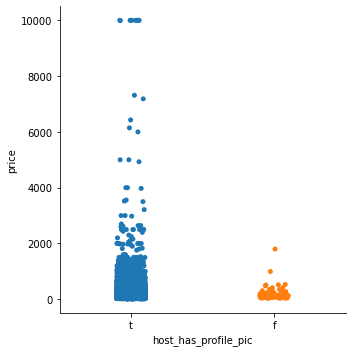

In [ ]:
sns.catplot(x="host_has_profile_pic", y="price", data=cleaned_col_price_data)

In [ ]:
#sns.catplot(x="host_identity_verified", y="price", data=cleaned_col_price_data)

#### Visualizing the number of rooms vs neighbourhood

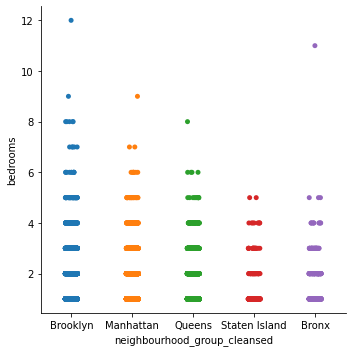

In [ ]:
sns.catplot(x="neighbourhood_group_cleansed", y="bedrooms",  data=cleaned_col_price_data)

#### Visualizing price based on neighbour hood

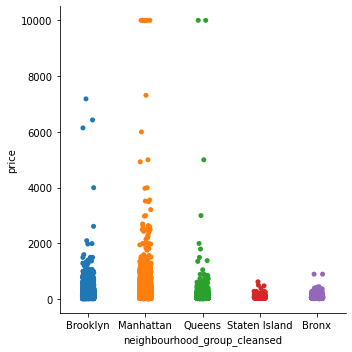

In [ ]:
sns.catplot(x="neighbourhood_group_cleansed", y="price", data=cleaned_col_price_data)

#### Visualizing the effect of bedrooms on price by considering neighborhood

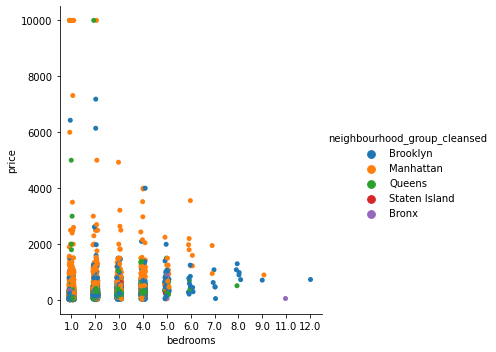

In [ ]:
sns.catplot(x="bedrooms", y="price", hue="neighbourhood_group_cleansed", data=cleaned_col_price_data)#, kind="swarm"

### 1.3.3 Label encodding: (t) , (f) 

In [ ]:
cleaned_col_price_data[["host_has_profile_pic","host_identity_verified"]].head()

,host_has_profile_pic,host_identity_verified
id,,
3831,t,t
5136,t,t
5178,t,f
5203,t,t
6990,t,t


In [ ]:
cleaned_col_price_data.host_has_profile_pic.unique()

array(['t', 'f'], dtype=object)

In [ ]:
cleaned_col_price_data.host_identity_verified.unique()

array(['t', 'f'], dtype=object)

In [ ]:
import re

def clean_text_round_t_f(text):
    '''Make text to one number bath'''
    text = text.lower()
    text = re.sub('t', '1', text)
    text = re.sub('f', '0', text)
    

    return int(text)

round3 = lambda x: clean_text_round_t_f(x)

In [ ]:
cleaned_col_t_f_data=cleaned_col_price_data
#host_has_profile_pic
clean_t_f_host_profile = pd.DataFrame(cleaned_col_t_f_data.host_has_profile_pic.apply(round3))
cleaned_col_t_f_data.host_has_profile_pic=clean_t_f_host_profile
#host_identity_verified
clean_t_f_host_identity = pd.DataFrame(cleaned_col_t_f_data.host_identity_verified.apply(round3))
cleaned_col_t_f_data.host_identity_verified=clean_t_f_host_identity




/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 1.3.3 Results of encodding

In [ ]:
cleaned_col_t_f_data.host_has_profile_pic.unique()

array([1, 0])

In [ ]:
cleaned_col_t_f_data.host_identity_verified.unique()

array([1, 0])

In [ ]:
cleaned_col_t_f_data[["host_has_profile_pic","host_identity_verified"]].head()

,host_has_profile_pic,host_identity_verified
id,,
3831,1,1
5136,1,1
5178,1,0
5203,1,1
6990,1,1


In [ ]:
# neighbourhood_group_cleansed, room_type

### 1.3.4 one hote encodding 

In [ ]:
cleaned_col_t_f_data[["neighbourhood_group_cleansed","room_type"]].head()

,neighbourhood_group_cleansed,room_type
id,,
3831,Brooklyn,Entire home/apt
5136,Brooklyn,Entire home/apt
5178,Manhattan,Private room
5203,Manhattan,Private room
6990,Manhattan,Private room


In [ ]:
cleaned_col_t_f_data.neighbourhood_group_cleansed.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
cleaned_col_t_f_data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

#### practice of one hot encodding

In [ ]:
cleaned_col_to_ctg_data = pd.get_dummies(cleaned_col_t_f_data)


### 1.3.4 Results of one hot

In [ ]:
cleaned_col_to_ctg_data.iloc[:,28:].head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,
3831,0,1,0,0,0,1,0,0,0
5136,0,1,0,0,0,1,0,0,0
5178,0,0,1,0,0,0,0,1,0
5203,0,0,1,0,0,0,0,1,0
6990,0,0,1,0,0,0,0,1,0


# 2.Review after cleaning

## 2.1Shape

In [ ]:
cleaned_col_to_ctg_data.shape

(24031, 37)

## 2.2Head()

In [ ]:
cleaned_col_to_ctg_data.head()

,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3831,1,1,40.68494,-73.95765,3,1.0,1.0,3.0,75.0,1,730,1.0,730.0,3,6,18,194,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,1,0,0,1,0,0,0,1,0,0,0
5136,1,1,40.66265,-73.99454,4,1.5,2.0,2.0,275.0,5,1125,5.0,1125.0,3,3,12,123,1,0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,1,0,0,1,0,0,0,1,0,0,0
5178,1,0,40.76457,-73.98317,2,1.0,1.0,1.0,68.0,2,14,2.0,14.0,1,16,34,192,33,2,4.21,4.21,3.73,4.66,4.42,4.87,4.36,0,1,0,0,1,0,0,0,0,1,0
5203,1,1,40.80380,-73.96751,1,1.0,1.0,1.0,75.0,2,14,2.0,14.0,0,0,0,0,0,0,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0,1,0,0,1,0,0,0,0,1,0
6990,1,1,40.78778,-73.94759,1,1.0,1.0,1.0,62.0,30,700,30.0,1125.0,1,4,34,309,1,0,4.88,4.81,4.96,4.96,4.95,4.84,4.84,0,1,0,0,1,0,0,0,0,1,0


## 2.3 nUnique()

In [ ]:
for col in cleaned_col_to_ctg_data.columns:
  print(f'{col:30s} >> {cleaned_col_to_ctg_data[col].nunique()}')

host_has_profile_pic           >> 2
host_identity_verified         >> 2
latitude                       >> 14047
longitude                      >> 11917
accommodates                   >> 16
bathrooms_text                 >> 17
bedrooms                       >> 11
beds                           >> 16
price                          >> 800
minimum_nights                 >> 89
maximum_nights                 >> 222
minimum_nights_avg_ntm         >> 310
maximum_nights_avg_ntm         >> 402
availability_30                >> 31
availability_60                >> 61
availability_90                >> 91
availability_365               >> 366
number_of_reviews_ltm          >> 132
number_of_reviews_l30d         >> 25
review_scores_rating           >> 152
review_scores_accuracy         >> 155
review_scores_cleanliness      >> 193
review_scores_checkin          >> 126
review_scores_communication    >> 133
review_scores_location         >> 150
review_scores_value            >> 157
calculated_host_listi

## 2.4 info()

In [ ]:
cleaned_col_to_ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24031 entries, 3831 to 53648074
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_has_profile_pic                          24031 non-null  int64  
 1   host_identity_verified                        24031 non-null  int64  
 2   latitude                                      24031 non-null  float64
 3   longitude                                     24031 non-null  float64
 4   accommodates                                  24031 non-null  int64  
 5   bathrooms_text                                24031 non-null  float64
 6   bedrooms                                      24031 non-null  float64
 7   beds                                          24031 non-null  float64
 8   price                                         24031 non-null  float64
 9   minimum_nights                                24031 non

## 2.5 Describe()

In [ ]:
cleaned_col_to_ctg_data.describe()

,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,2.403100e+04,24031.000000,2.403100e+04,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000
mean,0.995797,0.840165,40.726391,-73.945304,2.943490,1.157547,1.336399,1.663227,163.032042,18.538305,2.302288e+03,19.797162,2.627559e+06,6.205859,18.910324,32.986892,127.761683,6.861804,0.741126,4.690588,4.752226,4.617462,4.822106,4.817532,4.747464,4.659038,4.431443,3.971079,0.030461,0.421456,0.387000,0.150805,0.010278,0.528942,0.005326,0.451583,0.014148
std,0.064695,0.366461,0.057163,0.052758,1.910952,0.442044,0.706446,1.135283,283.056433,25.899068,1.824475e+05,38.339439,7.062516e+07,9.238083,21.017886,33.777661,138.520216,16.508861,1.694162,0.493862,0.479866,0.568097,0.422925,0.447401,0.410480,0.504473,23.874661,18.826583,0.171855,0.493803,0.487074,0.357866,0.100862,0.499172,0.072789,0.497661,0.118105
min,0.000000,0.000000,40.504560,-74.249840,1.000000,0.000000,1.000000,1.000000,10.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.686060,-73.980730,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,4.000000e+01,2.000000,2.017500e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,4.710000,4.500000,4.810000,4.820000,4.670000,4.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.720440,-73.952060,2.000000,1.000000,1.000000,1.000000,111.000000,30.000000,1.125000e+03,30.000000,1.125000e+03,1.000000,8.000000,24.000000,68.000000,1.000000,0.000000,4.830000,4.900000,4.800000,4.960000,4.970000,4.870000,4.790000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,40.761890,-73.926730,4.000000,1.000000,1.000000,2.000000,182.000000,30.000000,1.125000e+03,30.000000,1.125000e+03,10.000000,36.000000,65.000000,272.000000,6.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,40.913100,-73.710870,16.000000,8.000000,12.000000,21.000000,10000.000000,1250.000000,2.000000e+07,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,669.000000,67.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,308.000000,359.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3.Noise checking

## Checking the beds column max value

In [ ]:
cleaned_col_to_ctg_data.beds.unique()

array([ 3.,  2.,  1.,  4.,  6.,  5., 10.,  8., 18.,  9.,  7., 16., 12.,
       11., 21., 13.])

### We have 24031 data and 31 of them have more than 9 beds so they are a kind of noise in our data

In [ ]:
sum(cleaned_col_to_ctg_data.beds>9)

31

In [ ]:
eliminated_row=cleaned_col_to_ctg_data[cleaned_col_to_ctg_data.beds>9]
eliminated_row.head()


,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
45910,1,1,40.70309,-73.89963,16,2.5,5.0,10.0,395.0,30,730,30.0,730.0,14,44,74,349,0,0,4.42,4.64,4.36,4.82,5.00,4.82,4.55,5,1,0,0,0,1,0,1,0,0,0
279857,1,1,40.68607,-73.95536,16,4.0,8.0,18.0,900.0,3,1125,3.0,1125.0,4,18,48,266,24,4,4.86,4.77,4.77,4.87,4.93,4.70,4.85,0,1,0,1,0,0,0,0,0,1,0
509989,1,1,40.64186,-73.96428,16,2.5,5.0,16.0,371.0,1,29,1.0,29.0,9,39,69,344,0,0,4.79,4.76,4.61,4.91,4.94,4.89,4.68,1,0,0,1,0,0,0,1,0,0,0
512209,1,1,40.69923,-73.99402,16,5.5,5.0,12.0,950.0,4,99,4.0,99.0,0,0,0,0,0,0,4.95,4.97,4.98,4.98,4.98,4.98,4.89,1,0,0,1,0,0,0,1,0,0,0
4742102,1,1,40.73158,-73.78746,8,3.0,5.0,12.0,679.0,5,28,5.0,28.0,11,40,70,345,1,0,4.89,4.89,4.83,5.00,4.97,4.89,4.80,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
cleaned_col_to_ctg_data.drop(list(eliminated_row.index), inplace = True)

## Results of noise checking

In [ ]:
cleaned_col_to_ctg_data.describe()

,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.995792,0.840125,40.726390,-73.945327,2.931292,1.155312,1.331792,1.649792,162.340708,18.549667,2.304678e+03,19.810137,2.630952e+06,6.198000,18.889833,32.953167,127.619583,6.860000,0.740250,4.690502,4.752204,4.617383,4.821993,4.817496,4.747430,4.659029,4.434625,3.975792,0.030417,0.42150,0.387125,0.150708,0.010250,0.528667,0.005333,0.451958,0.014042
std,0.064736,0.366498,0.057146,0.052712,1.873869,0.435293,0.688217,1.068929,281.665499,25.910246,1.825653e+05,38.360054,7.067070e+07,9.234131,21.013177,33.771887,138.484435,16.513952,1.693733,0.494074,0.480072,0.568355,0.423153,0.447595,0.410615,0.504599,23.889794,18.838270,0.171734,0.49381,0.487103,0.357772,0.100724,0.499188,0.072836,0.497697,0.117665
min,0.000000,0.000000,40.504560,-74.249840,1.000000,0.000000,1.000000,1.000000,10.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.686070,-73.980732,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,4.175000e+01,2.000000,2.100000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,4.710000,4.500000,4.810000,4.820000,4.670000,4.570000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.720445,-73.952070,2.000000,1.000000,1.000000,1.000000,111.000000,30.000000,1.125000e+03,30.000000,1.125000e+03,1.000000,8.000000,24.000000,68.000000,1.000000,0.000000,4.830000,4.900000,4.800000,4.960000,4.970000,4.870000,4.790000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,40.761882,-73.926758,4.000000,1.000000,1.000000,2.000000,181.000000,30.000000,1.125000e+03,30.000000,1.125000e+03,10.000000,36.000000,65.000000,271.000000,6.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,40.913100,-73.710870,16.000000,8.000000,9.000000,9.000000,10000.000000,1250.000000,2.000000e+07,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,669.000000,67.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,308.000000,359.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4.Normalization

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = cleaned_col_to_ctg_data.columns
d = scaler.fit_transform(cleaned_col_to_ctg_data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,1.0,0.441523,0.542127,0.133333,0.1250,0.000,0.250,0.006507,0.000000,3.645000e-05,0.000000,3.394671e-07,0.100000,0.100000,0.200000,0.531507,0.047833,0.000000,0.890,0.916,0.898,0.956,0.960,0.942,0.928,0.003247,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.386963,0.473681,0.200000,0.1875,0.125,0.125,0.026527,0.003203,5.620000e-05,0.003203,5.234033e-07,0.100000,0.050000,0.133333,0.336986,0.001495,0.000000,1.000,1.000,1.000,1.000,1.000,0.900,1.000,0.003247,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.636437,0.494777,0.066667,0.1250,0.000,0.000,0.005806,0.000801,6.500000e-07,0.000801,6.053597e-09,0.033333,0.266667,0.377778,0.526027,0.049327,0.029851,0.842,0.842,0.746,0.932,0.884,0.974,0.872,0.000000,0.002786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.732462,0.523832,0.000000,0.1250,0.000,0.000,0.006507,0.000801,6.500000e-07,0.000801,6.053597e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982,0.966,0.964,0.994,0.990,0.988,0.984,0.000000,0.002786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.693249,0.560792,0.000000,0.1250,0.000,0.000,0.005205,0.023219,3.495000e-05,0.023219,5.234033e-07,0.033333,0.066667,0.377778,0.846575,0.001495,0.000000,0.976,0.962,0.992,0.992,0.990,0.968,0.968,0.000000,0.002786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
